**Video Game sales analysis - Kevin Shelly 6180**

In [ ]:
from google.colab import drive
drive.mount('/drive')

#import libs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns

#reading the dataset
data = pd.read_csv("/drive/MyDrive/vgsales.csv")
print(data.head())

#importing columns into notebook
name = data['NA_Sales']
plat = data['Platform']
year = data['Year']
genre = data['Genre']
pub = data['Publisher']
naSale = data['NA_Sales']
euSale = data['EU_Sales']
jpSale = data['JP_Sales']
othSale = data['Other_Sales']
glSale = data['Global_Sales']

plt.rcParams["figure.figsize"] = (14,9)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

Mounted at /drive
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data.shape

(16598, 11)

In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df=pd.DataFrame(data)
df.dropna(inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
print(data.head(10))

   Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29

1. **Count Plot** showing **Frequency** of **games** in different ***genres***

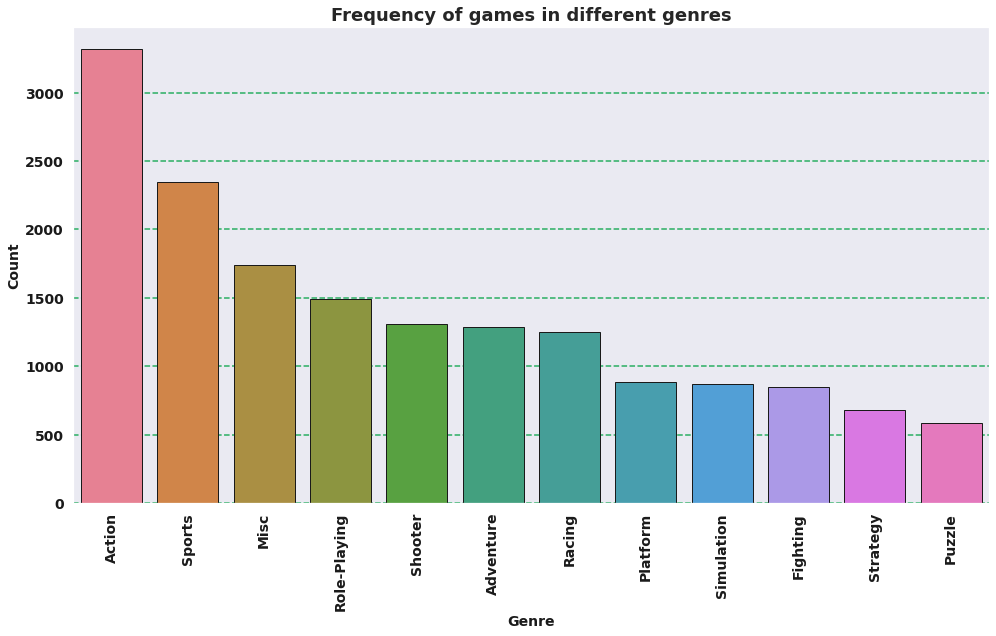

In [ ]:
sns.set_theme(style="darkgrid")
countgen = sns.countplot(x='Genre', palette = "husl", edgecolor = 'k', data=data, order = data['Genre'].value_counts().index)
countgen.set_xticklabels(countgen.get_xticklabels(), rotation = 90, fontsize = 14, color='k', weight='bold')
plt.xlabel("Genre", color= 'k',fontsize=14, weight='bold')
plt.ylabel("Count", color= 'k',fontsize=14, weight='bold')
plt.title("Frequency of games in different genres",weight='bold',size=18)
plt.yticks(color='k',fontsize=14, weight='bold')
plt.grid(axis='y', color='#27AE60', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()


From the above plot, it is clear that most games are made for the '**Action**' genre, while '**Puzzle**' genre has the lease number of games.

2. **Years** with **most game releases**

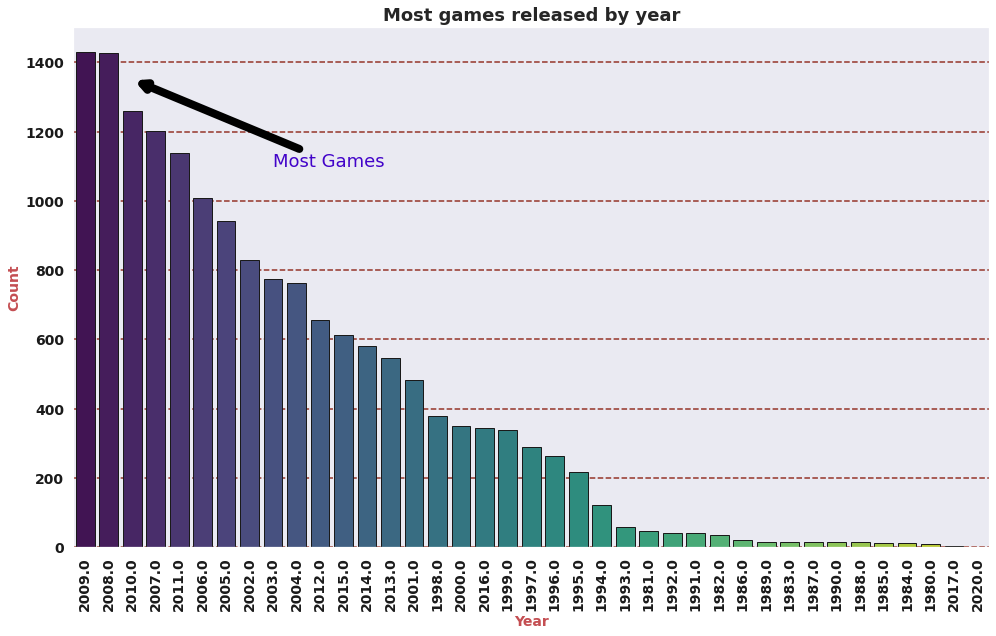

In [ ]:
sns.countplot(x="Year", data=data, palette = "viridis", edgecolor = 'k',
              order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90,color='k',fontsize=14, weight='bold')
plt.yticks(color='k',fontsize=14, weight='bold')
plt.xlabel("Year",fontsize = 14, color='r', weight='bold')
plt.ylabel("Count",fontsize = 14, color='r', weight='bold')
plt.title("Most games released by year",fontsize = 18,weight='bold')
plt.grid(axis='y', color='#943126', linestyle='--', linewidth=1.5)
plt.annotate("Most Games", xy=(2,1350), xytext=(8,1100), fontsize=18, color='#4203c9', arrowprops=dict(arrowstyle='->',color='black', linewidth=8))
plt.tight_layout()
plt.show()

From the above plot, we can see that the year **2009** had the highest number of games, with more than 100,000 copies sold, released. Whereas the year **2020** has the least number of games released above the 100,000 copies sold mark.

3. **Count** **Plot** showing number of **games** on each ***platform***

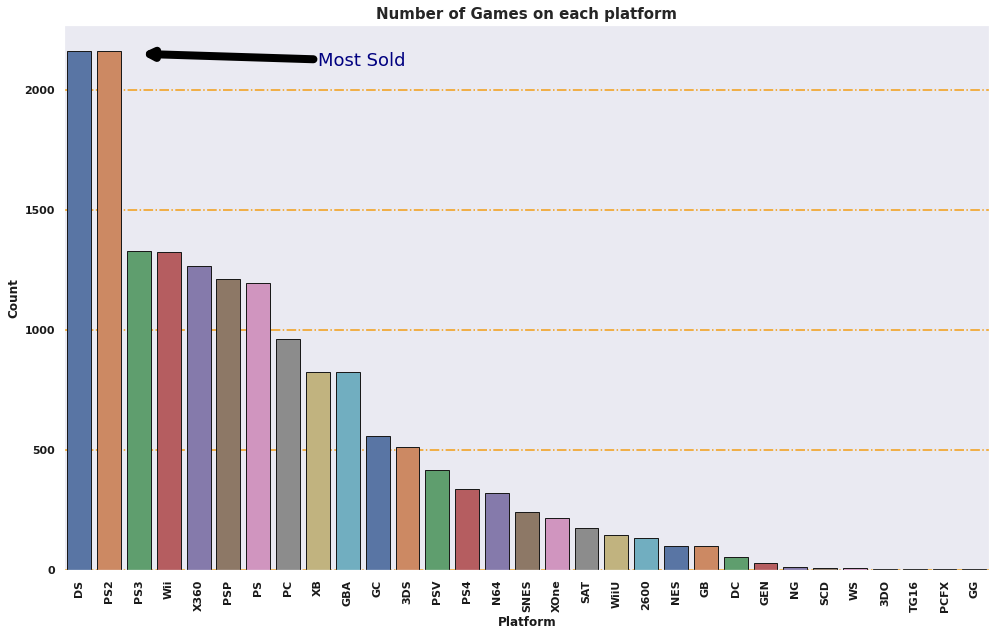

In [ ]:
sns.set_theme(style="darkgrid")

countgen = sns.countplot(x='Platform',palette = "deep",edgecolor = 'k', data=data,
                         order = data.groupby(by=['Platform'])['Name'].count().sort_values(ascending=False).index)
countgen.set_xticklabels(countgen.get_xticklabels(), rotation = 90, weight='bold', color='k')
plt.yticks(weight='bold', color='k')
#plt.rcParams["figure.figsize"] = (12,8.5)
plt.xlabel('Platform', weight='bold', color='k', fontsize=12)
plt.ylabel('Count', weight='bold', color='k', fontsize=12)
plt.title("Number of Games on each platform", weight='bold',size=15)
plt.grid(axis='y', color='#F39C12', linestyle='dashdot', linewidth=1.5)
plt.annotate("Most Sold", xy=(2,2150), xytext=(8,2100), fontsize=18, color='#000080',
             arrowprops=dict(arrowstyle='->',color='black', linewidth=8))
plt.tight_layout()
plt.show()

From the above plot, we can see that the **DS** and **PS2** are the **platforms** with the most number of games on them.

4. **Scatter plot** showing **distribution** of ***NA sales by year***

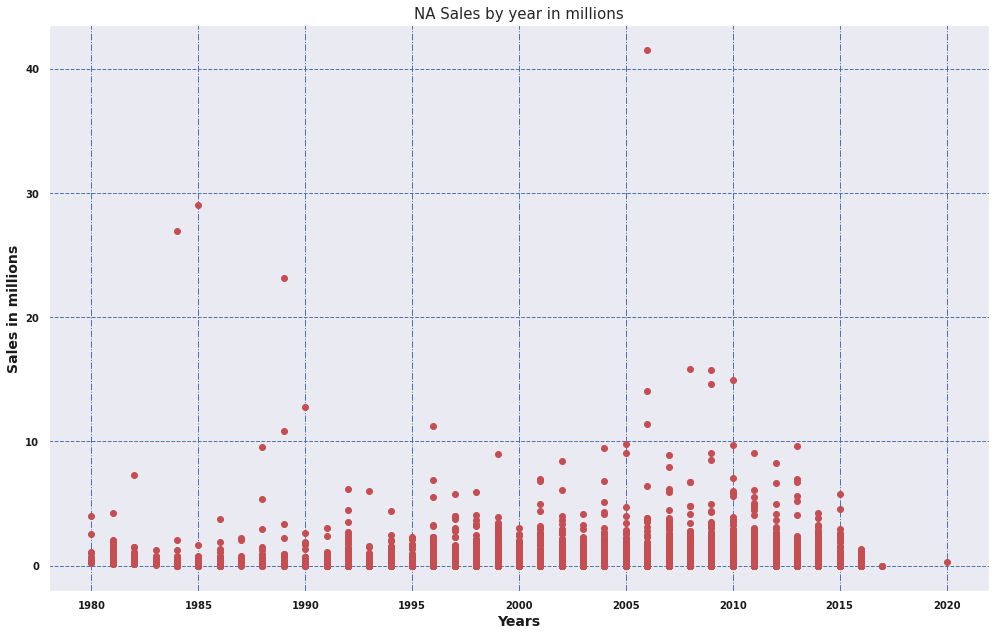

In [ ]:
sns.set_theme(style="darkgrid")
plt.scatter(year,naSale,color = 'r', marker='o')
plt.title("NA Sales by year in millions",size=15)
plt.xlabel('Years',color='k',fontsize=14, weight='bold')
plt.ylabel('Sales in millions',color='k',fontsize=14, weight='bold')
plt.xticks(color='k',fontsize=10, weight='bold')
plt.yticks(color='k',fontsize=10, weight='bold')
plt.grid(axis='y', color='b', linestyle='--', linewidth=1)
plt.grid(axis='x', color='b', linestyle='-.', linewidth=1)
plt.tight_layout()
plt.show()

From the above plot, we can infer that sales were very concentrated during the years ***1995-2015***, and it goes down as we approach 2020.

5. **Heatmap** showing the **NA**, **EU**, **JP**, and **Global sales** for games by ***genre*** in millions

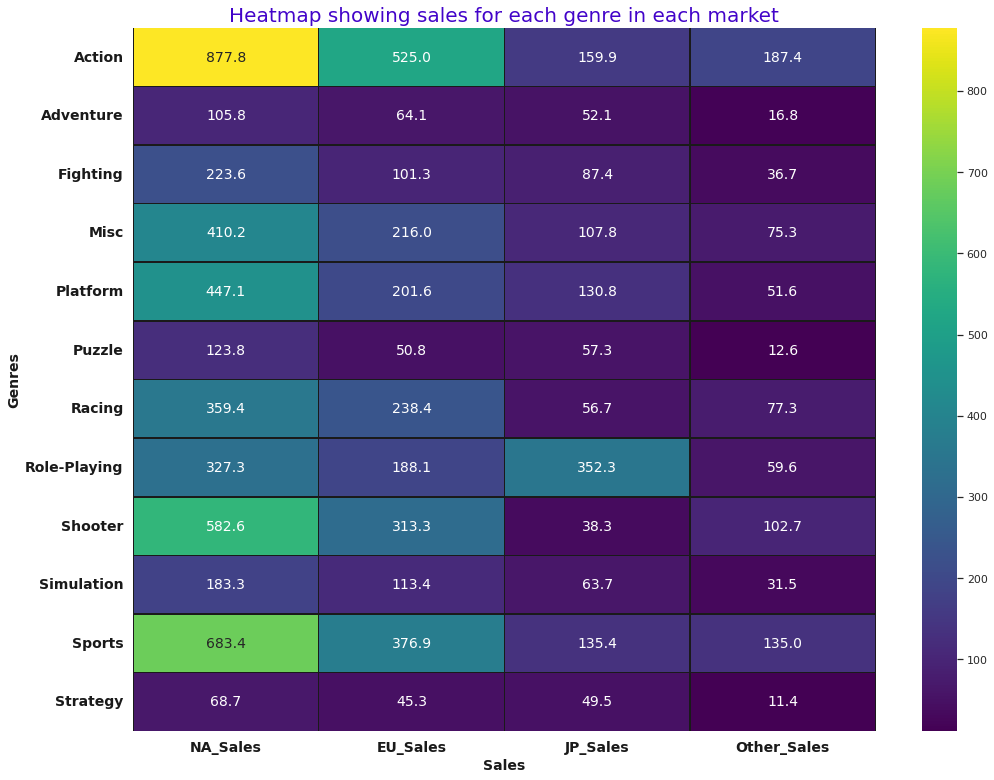

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map
plt.figure(figsize=(15,11))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, annot_kws = {"size":14},fmt = '.1f', linewidth=0.5 ,linecolor='k', cmap='viridis')

plt.xticks(fontsize=14, color='k', fontweight='bold')
plt.yticks(fontsize=14, color='k', fontweight='bold')
plt.xlabel('Sales',fontsize=14, color='k', fontweight='bold')
plt.ylabel('Genres',fontsize=14, color='k', fontweight='bold')
plt.title('Heatmap showing sales for each genre in each market',color='#4203c9',fontsize=20)
plt.tight_layout()
plt.show()

From the above plot, we can see that '***Action***' genre has the **highest sales** in all markets, while the lower side of the spectrum varies drastically according to markets.

6. **Top 5 years** with most **games** released in all **genres**

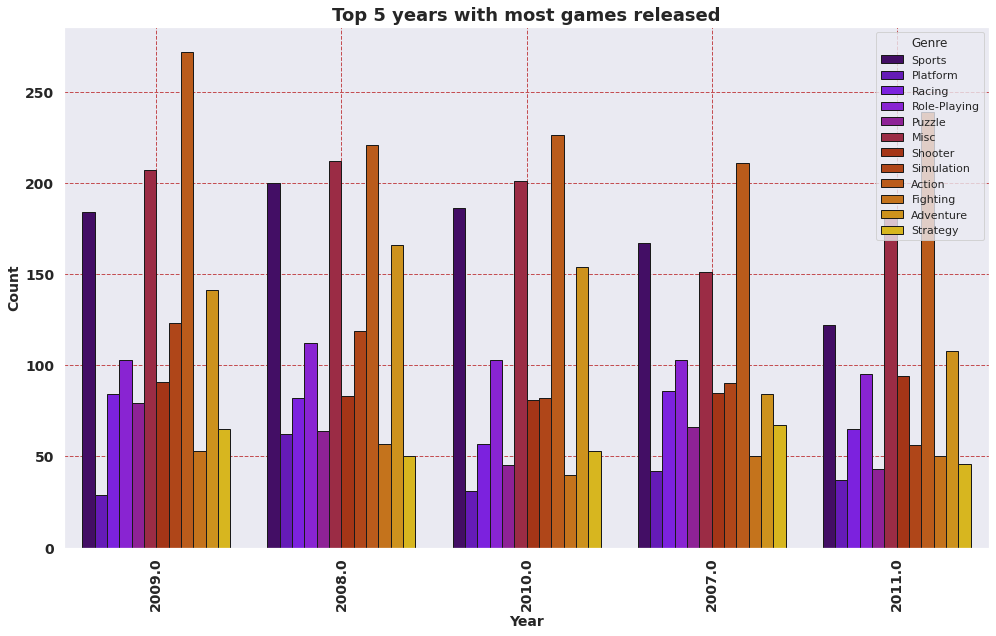

In [ ]:
sns.countplot(x="Year", data=data, hue='Genre',palette='gnuplot',edgecolor='k', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=14, rotation=90,weight='bold')
plt.yticks(size=14,weight='bold')
plt.xlabel("Year", fontsize=14,weight='bold')
plt.ylabel("Count", fontsize=14,weight='bold')
plt.title("Top 5 years with most games released", fontsize=18,weight='bold')
plt.grid(axis='y', color='r', linestyle='--', linewidth=1)
plt.grid(axis='x', color='r', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

From the above plot, we can see the top 5 years with most game releases are from the years **2007-2011**, with '**Action**' being the genre with **most games** released in **every year**.

7. **Pie chart** to show **distribution** of ***sales*** in all markets

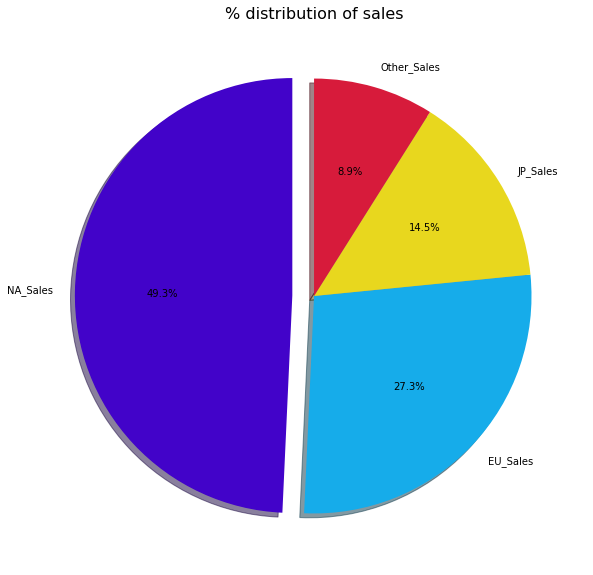

In [ ]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg.head()
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
myExp = [0.1,0.0,0.0,0.0]
colors = [   '#4203c9', '#16acea', '#e8d71e', '#d71b3b']
plt.figure(figsize=(13, 10))
plt.pie(sizes, colors = colors, labels=labels ,autopct='%1.1f%%', shadow=True, startangle=90, counterclock= True, explode=myExp)
plt.title('% distribution of sales', fontsize=16, color='k')
plt.show()

From the above pie plot, we can infer that **North America** is the ***biggest market*** for video game sales, making up for almost **50% **of the entire sales, followed by **Europe** and **Japan**.

8. **Strip plot** to show ***NA***, ***EU***, ***JP***, and ***Global*** **sales** throughout the years

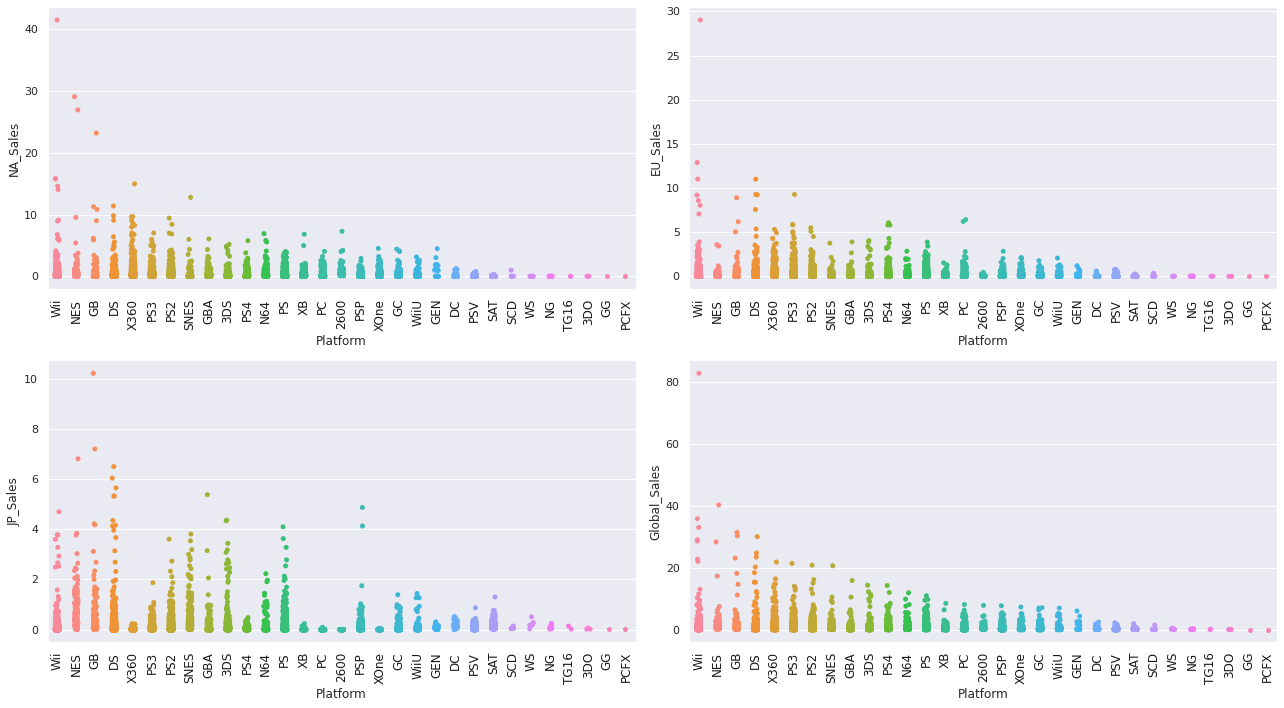

In [ ]:
plt.figure(figsize=(18,10))
sns.set_theme(style = 'darkgrid')
plt.subplot(2,2,1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nastrip = sns.stripplot(y = 'NA_Sales',x = 'Platform',data = data)
nastrip.set_xticklabels(nastrip.get_xticklabels(), rotation = 90, color='k',fontsize=12)
plt.subplot(2,2,2)
eustrip = sns.stripplot(y = 'EU_Sales',x = 'Platform',data = data)
eustrip.set_xticklabels(eustrip.get_xticklabels(), rotation = 90, color='k',fontsize=12)
plt.subplot(2,2,3)
jpstrip = sns.stripplot(y = 'JP_Sales',x = 'Platform',data = data)
jpstrip.set_xticklabels(jpstrip.get_xticklabels(), rotation = 90, color='k',fontsize=12)
plt.subplot(2,2,4)
glstrip = sns.stripplot(y = 'Global_Sales',x = 'Platform',data = data)
glstrip.set_xticklabels(glstrip.get_xticklabels(), rotation = 90, color='k',fontsize=12)
plt.tight_layout()
plt.show()

From the above comparison, we can conclude that the **Wii**, **NES**, **GB** and **DS** are the few platforms with the ***highest sales*** in all the markets

9. ***Bar plot*** to show **global sales** of each ***platform***

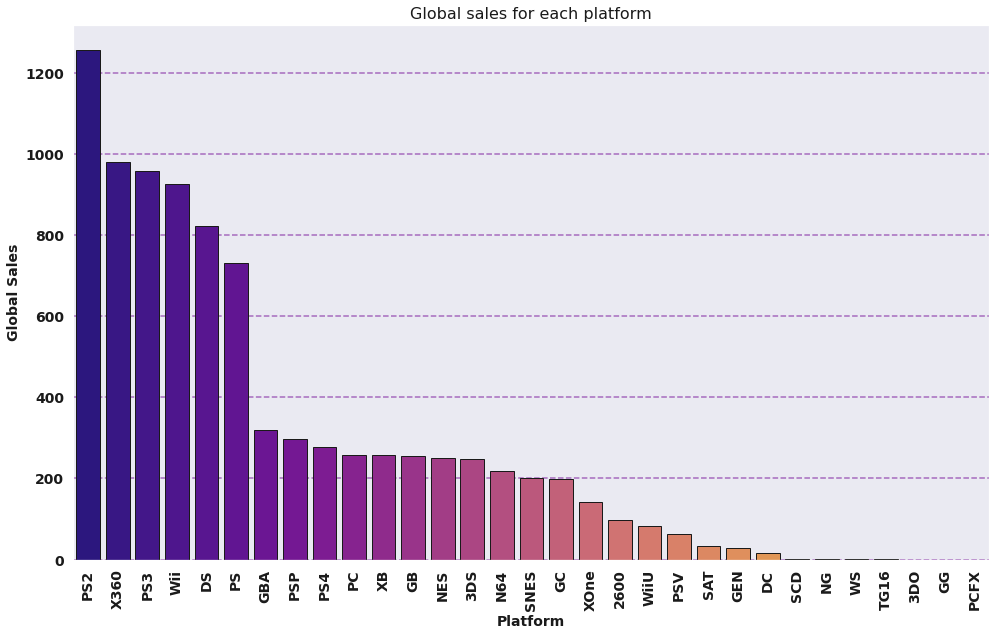

In [ ]:
data_genre = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

sns.barplot(x="Platform", y="Global_Sales", data=data_genre, palette = 'plasma', edgecolor='k')
plt.xticks(rotation=90,color='k',fontsize=14, weight='bold')
plt.yticks(color='k',fontsize=14, weight='bold')
plt.xlabel('Platform', color='k', fontsize=14, weight='bold')
plt.ylabel('Global Sales', color='k', fontsize=14, weight='bold')
plt.title('Global sales for each platform',color='k',fontsize=16)
plt.grid(axis='y', color='#A569BD', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()

From the above plot, we can conclude that the ***PS2*** is the **most successful platform** in terms of ***sales*** in the global market

10. ***Bar plot*** to show **North America sales** of each ***platform***

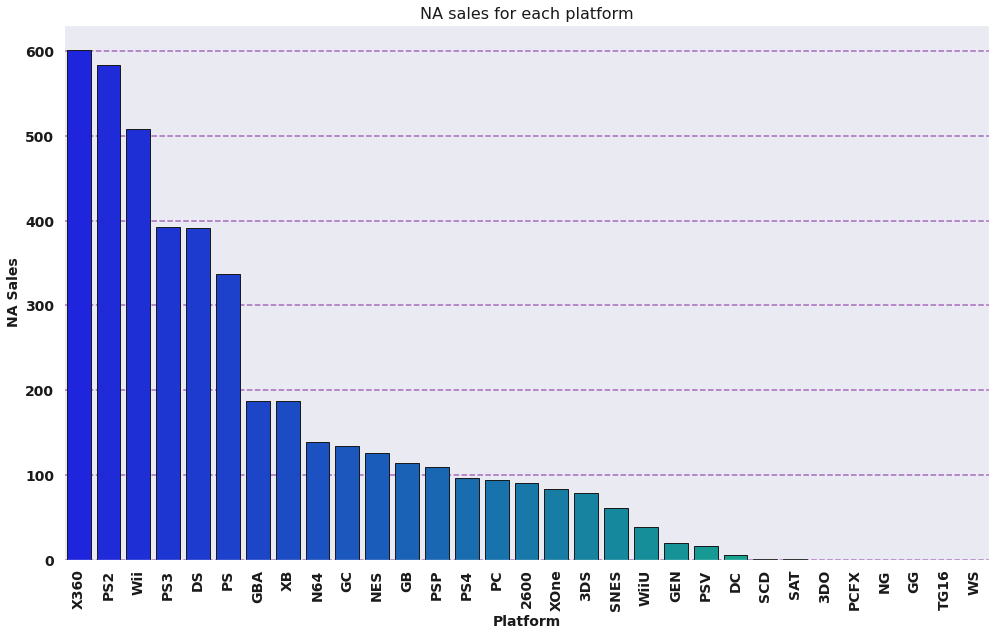

In [ ]:
data_genre = data.groupby(by=['Platform'])['NA_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['NA_Sales'], ascending=False)
sns.set_theme(style='darkgrid')
sns.barplot(x="Platform", y="NA_Sales", data=data_genre, palette='winter', edgecolor='k')
plt.xticks(rotation=90,color='k',fontsize=14, weight='bold')
plt.yticks(color='k',fontsize=14, weight='bold')
plt.xlabel('Platform', color='k', fontsize=14, weight='bold')
plt.ylabel('NA Sales', color='k', fontsize=14, weight='bold')
plt.title('NA sales for each platform',color='k',fontsize=16)
plt.grid(axis='y', color='#A569BD', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()

From the above plot, we can conclude that the ***Xbox 360*** is the **most successful platform** in terms of ***sales*** in the North American market

11. ***Bar plot*** to show **Europe sales** of each ***platform***

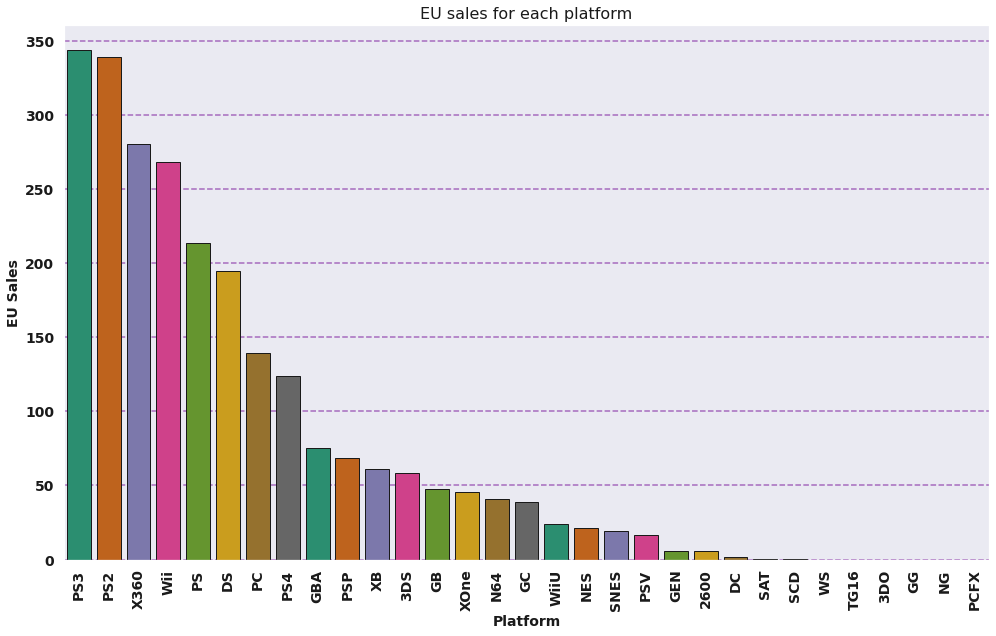

In [ ]:
data_genre = data.groupby(by=['Platform'])['EU_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['EU_Sales'], ascending=False)
sns.set_theme(style='darkgrid')
sns.barplot(x="Platform", y="EU_Sales", data=data_genre, palette = 'Dark2', edgecolor='k')
plt.xticks(rotation=90,color='k',fontsize=14, weight='bold')
plt.yticks(color='k',fontsize=14, weight='bold')
plt.xlabel('Platform', color='k', fontsize=14, weight='bold')
plt.ylabel('EU Sales', color='k', fontsize=14, weight='bold')
plt.title('EU sales for each platform',color='k',fontsize=16)
plt.grid(axis='y', color='#A569BD', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()

From the above plot, we can conclude that the ***PS3*** is the **most successful platform** in terms of ***sales*** in the European market

12. ***Bar plot*** to show **Japan sales** of each ***platform***

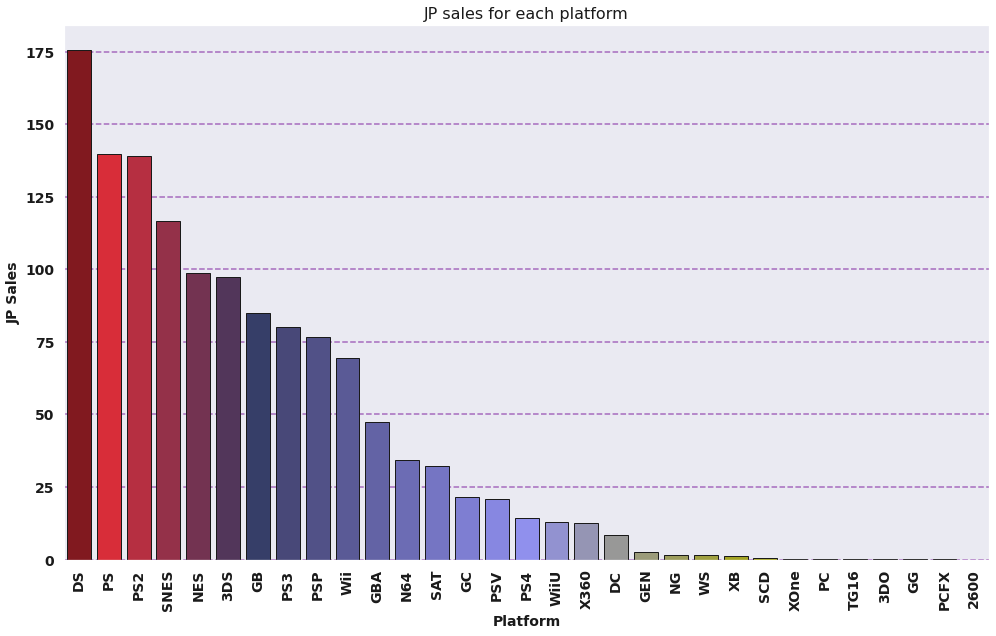

In [ ]:
data_genre = data.groupby(by=['Platform'])['JP_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['JP_Sales'], ascending=False)
sns.set_theme(style='darkgrid')
sns.barplot(x="Platform", y="JP_Sales", data=data_genre, palette = 'gist_stern', edgecolor='k')
plt.xticks(rotation=90,color='k',fontsize=14, weight='bold')
plt.yticks(color='k',fontsize=14, weight='bold')
plt.xlabel('Platform', color='k', fontsize=14, weight='bold')
plt.ylabel('JP Sales', color='k', fontsize=14, weight='bold')
plt.title('JP sales for each platform',color='k',fontsize=16)
plt.grid(axis='y', color='#A569BD', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()

From the above plot, we can conclude that the ***DS*** is the **most successful platform** in terms of ***sales*** in the Japanese market

In [ ]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

13. **ViolinPlot** to show ***Genre-wise*** distribution of **global sales**

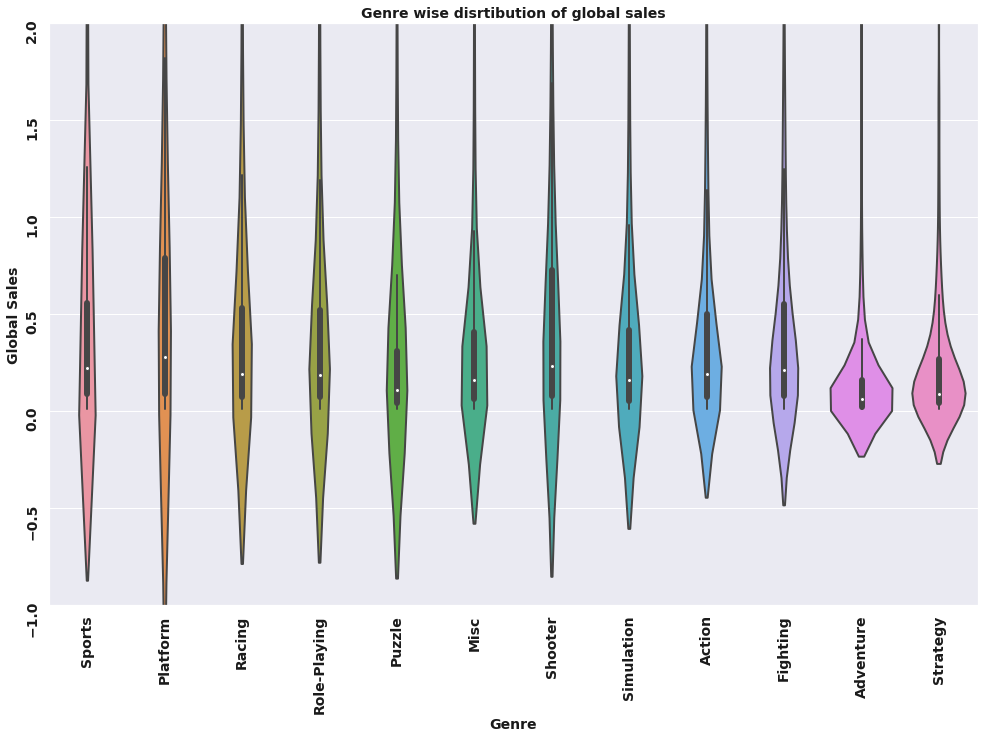

In [ ]:
sns.violinplot(x=genre,y=glSale,linewidth=2)
plt.ylim(-1,2)
plt.tight_layout()
plt.xticks(size=14, rotation=90, color='k', weight='bold')
plt.yticks(size=14, rotation=90, color='k', weight='bold')
plt.ylabel('Global Sales',size=14, color='k', weight='bold')
plt.xlabel('Genre',size=14, color='k', weight='bold')
plt.title('Genre wise disrtibution of global sales',size=14, color='k', weight='bold')
plt.show()

We can see that the **median** sales of all ***genres*** lie between **0.2 to 0.5 million USD**

14. **Wordcloud** showing all ***titles*** of **games**

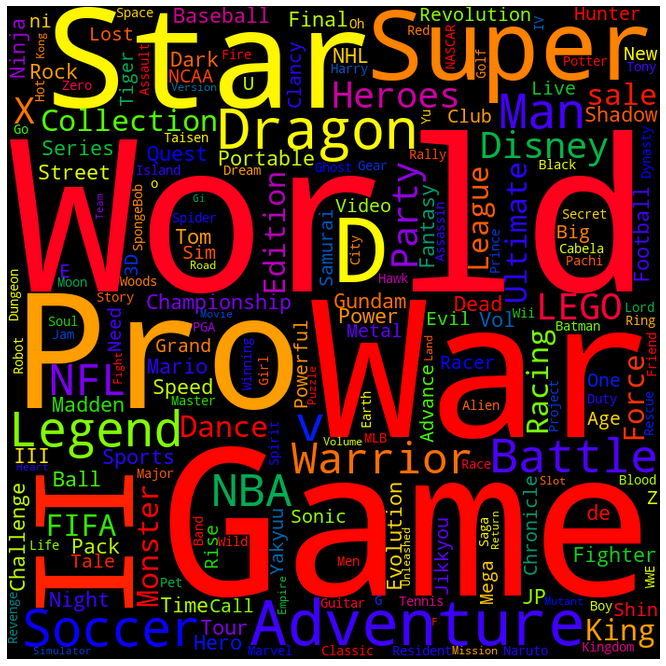

In [ ]:
text2 = " ".join(Name for Name in data.Name)
word_cloud = WordCloud(width = 700, height = 700, background_color='black',
                       random_state=1, collocations = False, colormap='prism').generate(text2)
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='lanczos')
plt.axis("off")
plt.show()


The most **common** words in **titles** are shown in the ***biggest font***